# Modeling Spring Motion with Analytical Model, Computational Model, and Experimental Data

In [319]:
# Import Libraries
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [320]:
# Constants
gravitational_acceleration = 9.81  # m/s^2
mass = 0.2  # kg
computational_spring_constant = 24.338422398666662  # N/m

In [321]:
# Computational Model
def computational_model(times, computational_spring_constant, computational_amplitude):
    accelerations = [0]
    velocities = [0]
    displacements = [computational_amplitude]
    for i in range(len(times) - 1):
        velocities.append(velocities[-1] + accelerations[-1] * (times[i + 1] - times[i]))
        displacements.append(displacements[-1] + velocities[-1] * (times[i + 1] - times[i]))
        accelerations.append(-computational_spring_constant * displacements[-1] / mass)
    return accelerations, velocities, displacements

In [322]:
# Load Experimental Data and Fit Analytical Model
data1 = pd.read_csv("MotionData1.csv")

In [323]:
def analyticial_model(times):
    positions = []
    for time in times:
        positions.append(data1["Position (m)"][0] * math.cos(math.sqrt(computational_spring_constant / mass) * time))
    return positions

In [324]:
# Compute Models
times = np.linspace(0, data1["Time (s)"].iat[-1], 10000)
computational_accelerations, computational_velocities, computational_positions = computational_model(times, computational_spring_constant, data1["Position (m)"][0])
analytical_positions = analyticial_model(times)

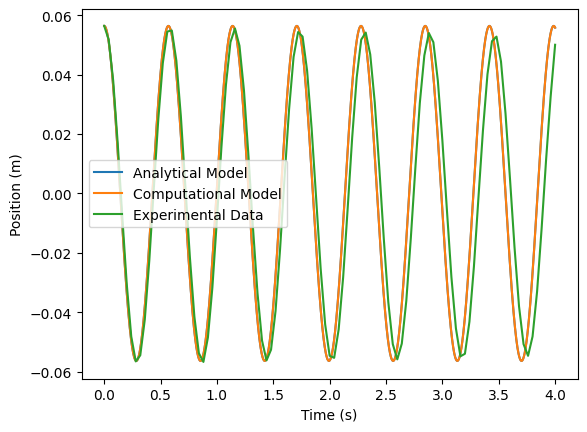

In [325]:
# Plot Models
plt.plot(times, analytical_positions, label="Analytical Model")
plt.plot(times, computational_positions, label="Computational Model")
plt.plot(data1["Time (s)"], data1["Position (m)"], label="Experimental Data")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.savefig("Data1.png", dpi=300)
plt.show()

## Energy Graphs

In [326]:
# Compute Energies
def compute_energies(positions, velocities, min_position):
    spring_zero_position = -min_position + mass * gravitational_acceleration / computational_spring_constant
    gravitational_potential_energies = []
    elastic_potential_energies = []
    kinetic_energies = []
    total_energies = []
    for i in range(len(positions)):
        gravitational_potential_energies.append(mass * gravitational_acceleration * positions[i])
        elastic_potential_energies.append(computational_spring_constant * (spring_zero_position - positions[i]) ** 2 / 2) # start pos - pos [i]
        kinetic_energies.append(mass * velocities[i] ** 2 / 2)
        total_energies.append(
            gravitational_potential_energies[-1] + elastic_potential_energies[-1] + kinetic_energies[-1])
    return gravitational_potential_energies, elastic_potential_energies, kinetic_energies, total_energies

In [327]:
# Calculate Energies
min_position = min(computational_positions)
calibrated_computational_positions = [position - min_position for position in computational_positions]
computational_gravitational_potential_energies, computational_elastic_potential_energies, computational_kinetic_energies, computational_total_energies = compute_energies(calibrated_computational_positions, computational_velocities, min_position)

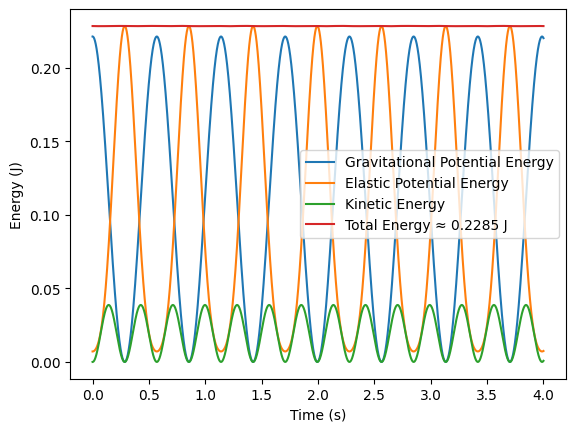

In [328]:
# Plot Energies
plt.plot(times, computational_gravitational_potential_energies, label="Gravitational Potential Energy")
plt.plot(times, computational_elastic_potential_energies, label="Elastic Potential Energy")
plt.plot(times, computational_kinetic_energies, label="Kinetic Energy")
plt.plot(times, computational_total_energies, label=f"Total Energy ≈ {statistics.mean(computational_total_energies):.4f} J")
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.legend()
plt.savefig("ComputationalEnergies.png", dpi=300)
plt.show()